<a href="https://colab.research.google.com/github/mendi2/08MBID-AG3/blob/main/08MBID_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08MBID Visualización de Datos - Actividad Guiada 3

In [12]:
# Importar los modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [13]:
# Cargar el dataset
url="http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv?"
#url="raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [14]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
# Informacion del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [16]:
# Renombrar columnas
titanic.rename(columns={'class':'clase'},inplace=True)
titanic.rename(columns={'fare':'tarifa'},inplace=True)

# Mostrar valores unicos (clases)
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [17]:
# Primeras 5 filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# Añadir columna is_old, is_baby
def is_old_func(row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

titanic.eval( ' is_baby = age < 15' , inplace = True)

In [19]:
#Imprimir dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


In [20]:
# Columna class_num
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [21]:
#Imprimir dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


Mostrar hombres de primera y tercera clase mayores de 45 no supervivientes

In [22]:
# Query
titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First','Third'])) & (titanic.age > 45) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


Mostrar mujeres de primera y tercera clase mayores de 45 que no sobrevivieron

In [23]:
# Query
titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First','Third'])) & (titanic.age > 45) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

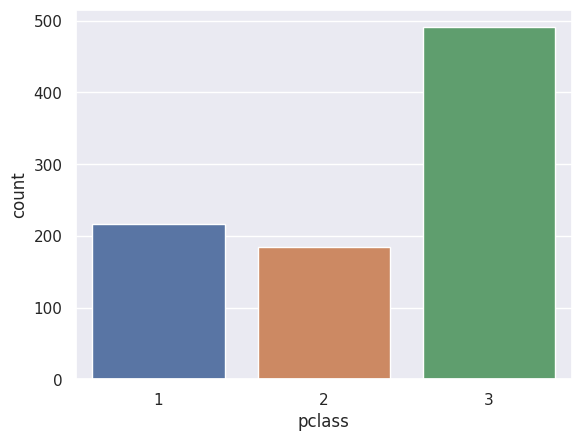

In [24]:
# Distribucion de la variable clase
sns.countplot(x="pclass", data=titanic)

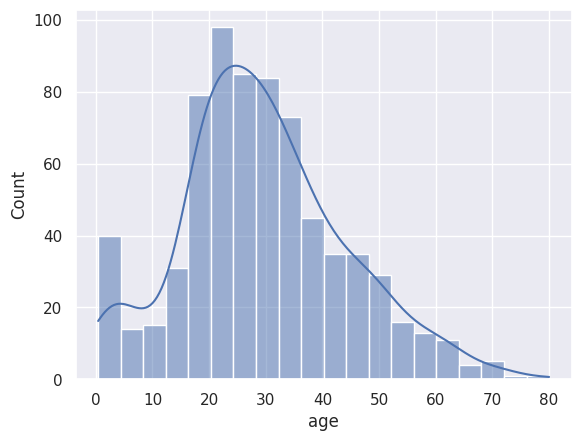

In [25]:
# Distribucion basado en histogramas por la edad
# Eliminando los valores nulos de la edad con dropna()
sns.histplot(titanic.age.dropna(), kde=True)
plt.show()

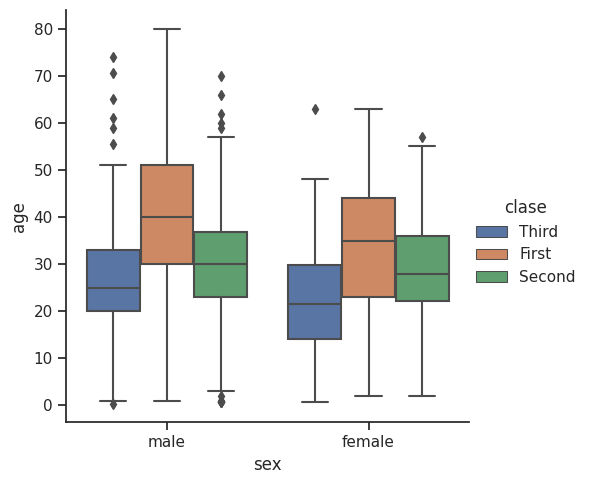

In [26]:
# Boxplot edad vs sexo
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")

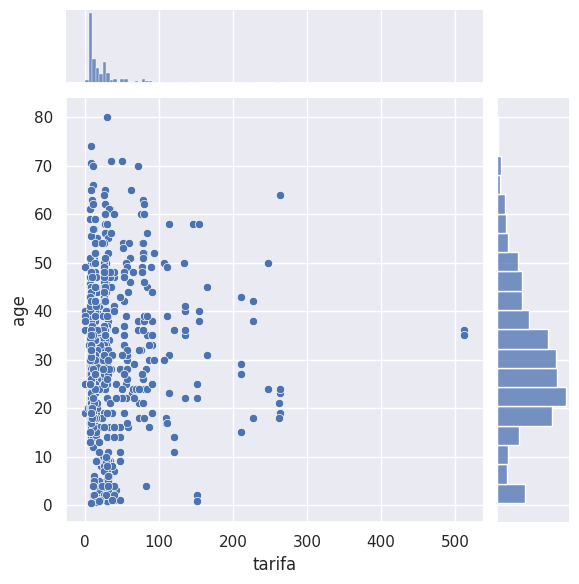

In [27]:
# Distribucion cruzada
sns.jointplot(data=titanic, x="tarifa", y="age" )

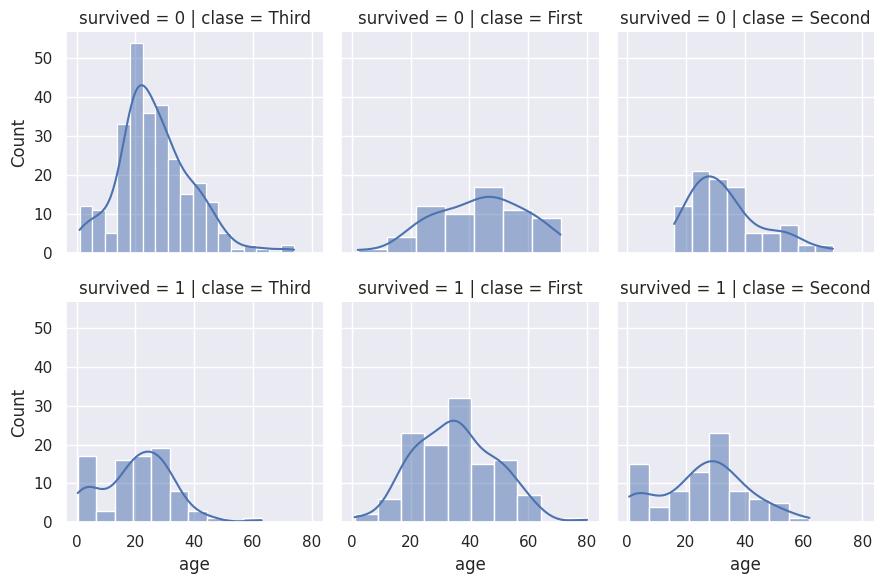

In [28]:
# Matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

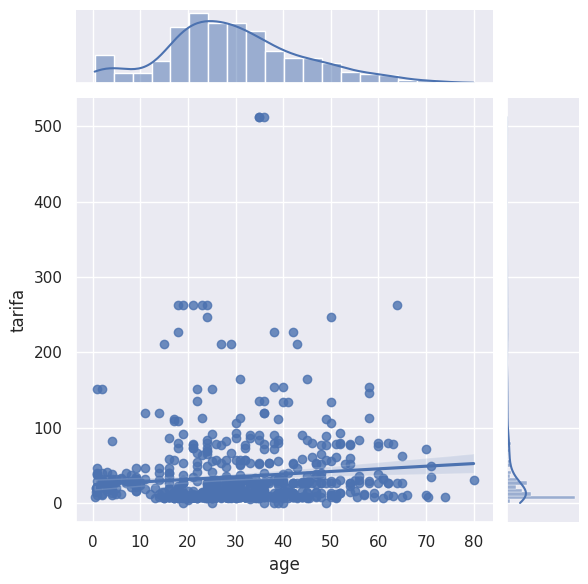

In [29]:
# Diamagra de dispersión
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

<ipython-input-34-bcc4dfd1d59c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

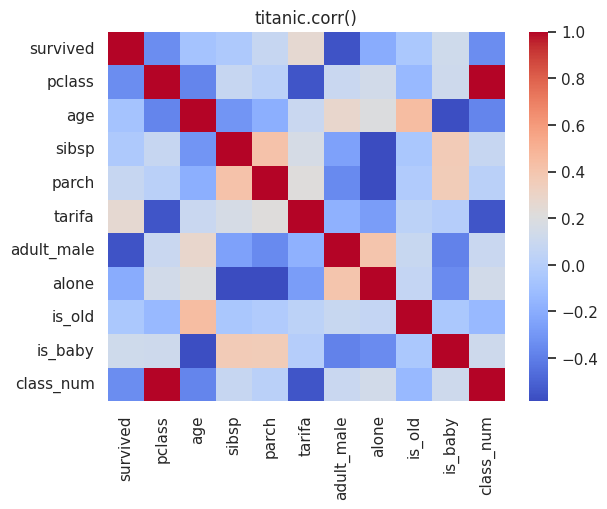

In [34]:
# Diagrama de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm' )
plt.title('titanic.corr()')

<function matplotlib.pyplot.show(close=None, block=None)>

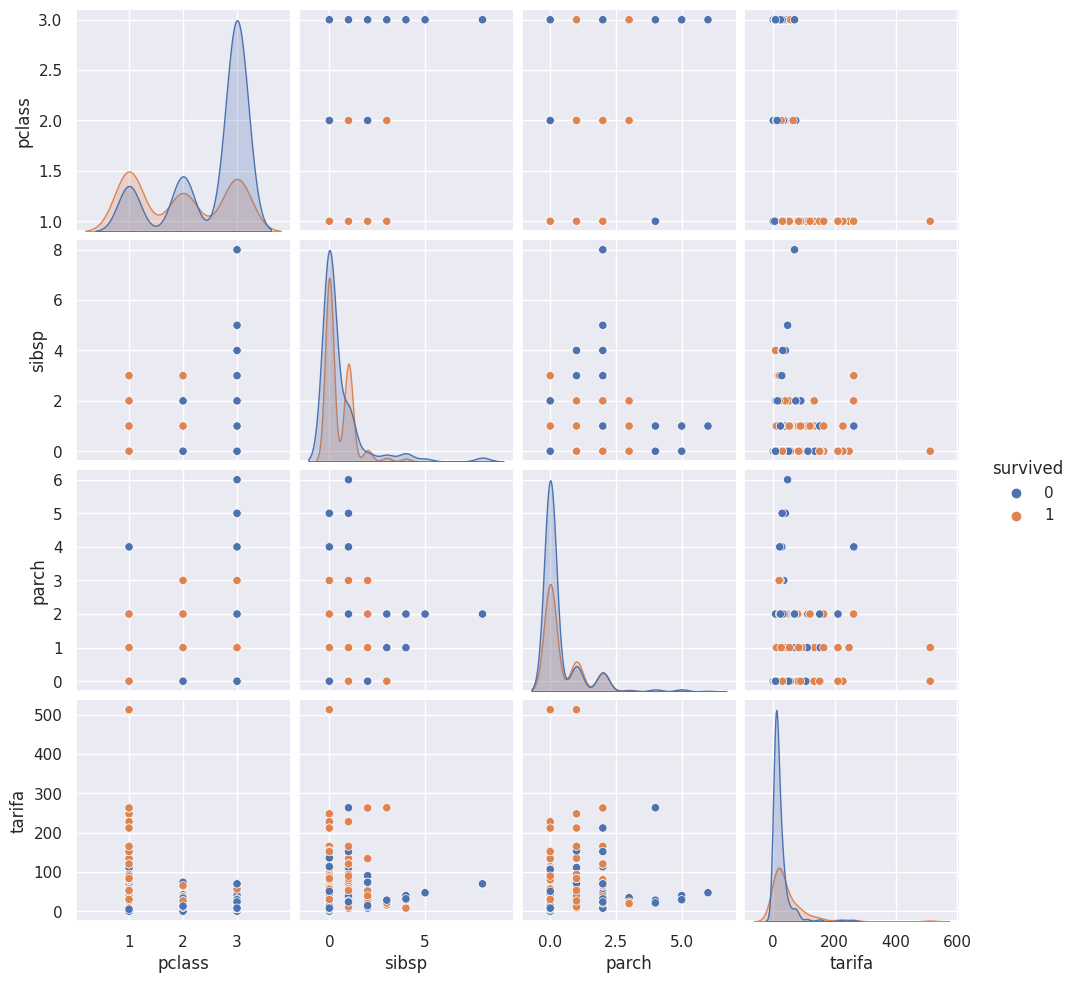

In [31]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived', 'pclass', 'sibsp', 'parch', 'tarifa']]

#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num , hue='survived')
plt.show

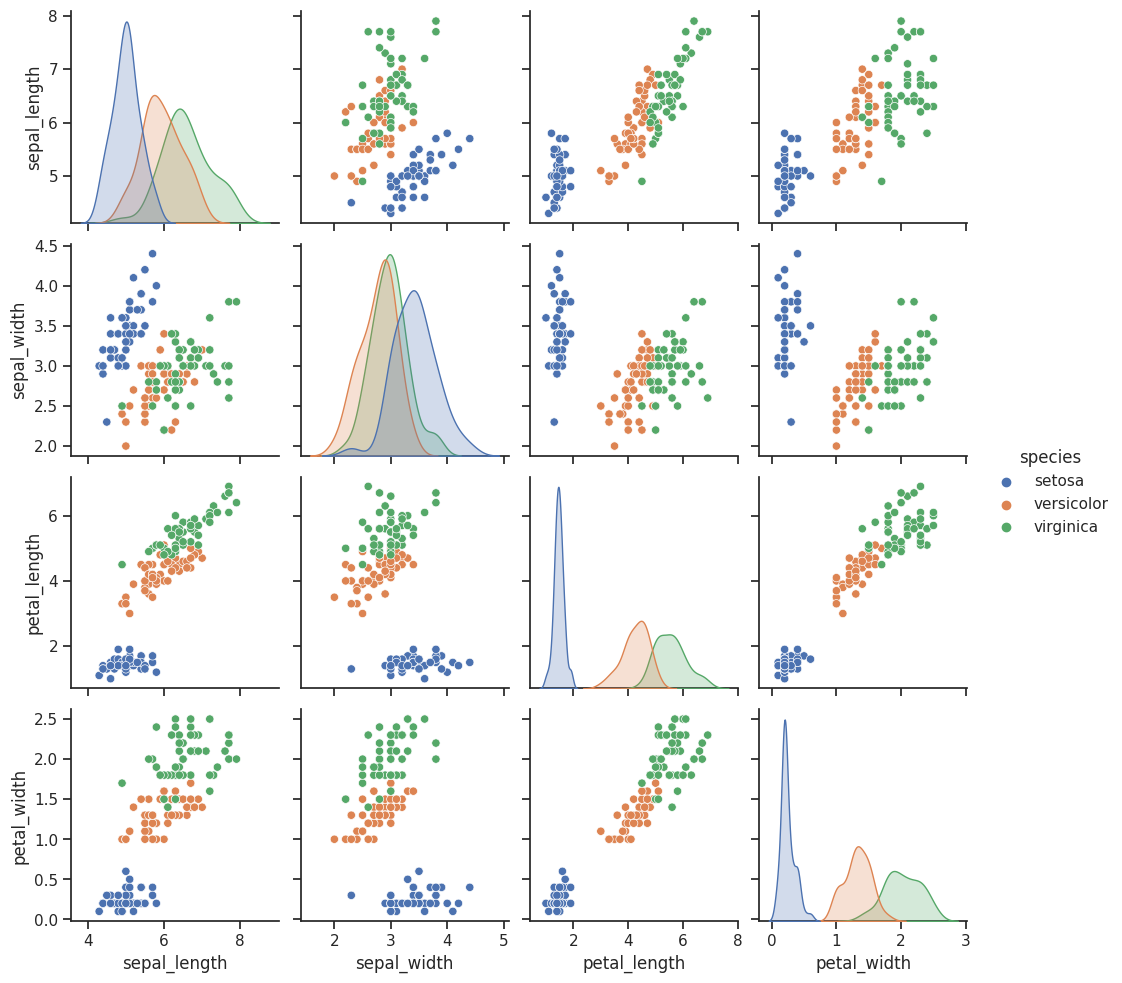

In [32]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")

#Carga el data set
df = sns.load_dataset("iris")

#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")

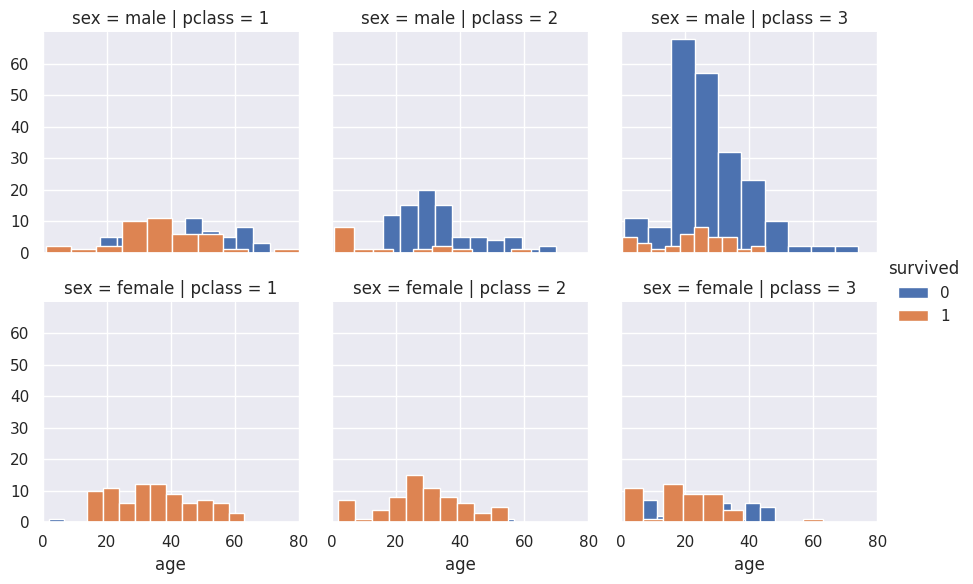

In [33]:
import numpy as np
titanic_extra = titanic[['survived','pclass','age','sex']]
plt.rcParams["patch.force_edgecolor"] = False
sns.set_theme(style="darkgrid")

g = sns.FacetGrid(titanic_extra, row="sex", col="pclass", hue = "survived"
                  ).set(xlim=(0, 70), ylim=(0, 70), yticks=np.arange(0,70,10) , xticks=np.arange(0,90,20)                   
                  )
g.map(plt.hist, "age" ).add_legend()